### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

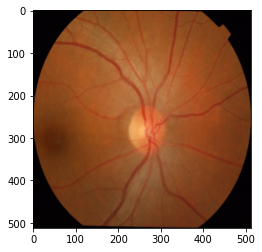

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
value_channel_train = convert_to_hsv(2, img_train)
len(value_channel_train)

50

### Test images

In [5]:
value_channel_test = convert_to_hsv(2, img_test)
len(value_channel_test)

51

#### Generator of augmented data:

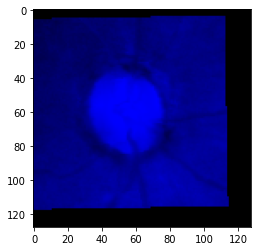

In [6]:
gen = data_generator(value_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


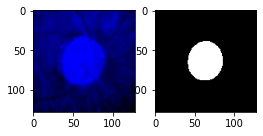

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(value_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(value_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_value', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 36s 335ms/step - loss: 1.5582 - mean_IOU_gpu: 0.0959 - dice_metric: 0.1722 - val_loss: 1.4562 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 32s 327ms/step - loss: 1.5340 - mean_IOU_gpu: 0.1590 - dice_metric: 0.2695 - val_loss: 1.3889 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 32s 326ms/step - loss: 1.5102 - mean_IOU_gpu: 0.1613 - dice_metric: 0.2759 - val_loss: 1.2996 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 33s 329ms/step - loss: 1.3505 - mean_IOU_gpu: 0.1779 - dice_metric: 0.2993 - val_loss: 1.1590 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 32s 327ms/step - loss: 1.2753 - mean_IOU_gpu: 0.1905 - dice_metric: 0.3159 - val_loss: 0.9583 - val_mean_IOU_gpu: 0

Epoch 82/500
99/99 [==============================] - 32s 325ms/step - loss: 0.2306 - mean_IOU_gpu: 0.6326 - dice_metric: 0.7616 - val_loss: 0.3312 - val_mean_IOU_gpu: 0.5297 - val_dice_metric: 0.6756
Epoch 83/500
99/99 [==============================] - 32s 327ms/step - loss: 0.1949 - mean_IOU_gpu: 0.6557 - dice_metric: 0.7834 - val_loss: 0.3816 - val_mean_IOU_gpu: 0.4775 - val_dice_metric: 0.6279
Epoch 84/500
99/99 [==============================] - 32s 327ms/step - loss: 0.1609 - mean_IOU_gpu: 0.7129 - dice_metric: 0.8240 - val_loss: 0.3160 - val_mean_IOU_gpu: 0.5466 - val_dice_metric: 0.6904
Epoch 85/500
99/99 [==============================] - 33s 329ms/step - loss: 0.1817 - mean_IOU_gpu: 0.6802 - dice_metric: 0.8003 - val_loss: 0.4387 - val_mean_IOU_gpu: 0.4165 - val_dice_metric: 0.5633
Epoch 86/500
99/99 [==============================] - 33s 329ms/step - loss: 0.2079 - mean_IOU_gpu: 0.6517 - dice_metric: 0.7786 - val_loss: 0.2553 - val_mean_IOU_gpu: 0.6052 - val_dice_metric: 0.

99/99 [==============================] - 32s 327ms/step - loss: 0.1963 - mean_IOU_gpu: 0.6813 - dice_metric: 0.7958 - val_loss: 0.2301 - val_mean_IOU_gpu: 0.6335 - val_dice_metric: 0.7656
Epoch 163/500
99/99 [==============================] - 33s 331ms/step - loss: 0.1757 - mean_IOU_gpu: 0.6839 - dice_metric: 0.8023 - val_loss: 0.2110 - val_mean_IOU_gpu: 0.6379 - val_dice_metric: 0.7719
Epoch 164/500
99/99 [==============================] - 32s 326ms/step - loss: 0.1690 - mean_IOU_gpu: 0.6964 - dice_metric: 0.8113 - val_loss: 0.2117 - val_mean_IOU_gpu: 0.6569 - val_dice_metric: 0.7856
Epoch 165/500
99/99 [==============================] - 33s 330ms/step - loss: 0.1184 - mean_IOU_gpu: 0.7615 - dice_metric: 0.8598 - val_loss: 0.3300 - val_mean_IOU_gpu: 0.5468 - val_dice_metric: 0.6880
Epoch 166/500
99/99 [==============================] - 32s 326ms/step - loss: 0.1549 - mean_IOU_gpu: 0.7185 - dice_metric: 0.8279 - val_loss: 0.2391 - val_mean_IOU_gpu: 0.6193 - val_dice_metric: 0.7568
Epoc

Epoch 203/500
99/99 [==============================] - 32s 326ms/step - loss: 0.1778 - mean_IOU_gpu: 0.6901 - dice_metric: 0.8062 - val_loss: 0.3743 - val_mean_IOU_gpu: 0.4545 - val_dice_metric: 0.5816
Epoch 204/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1433 - mean_IOU_gpu: 0.7327 - dice_metric: 0.8374 - val_loss: 0.3073 - val_mean_IOU_gpu: 0.5391 - val_dice_metric: 0.6770
Epoch 205/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1438 - mean_IOU_gpu: 0.7378 - dice_metric: 0.8402 - val_loss: 0.5171 - val_mean_IOU_gpu: 0.3693 - val_dice_metric: 0.4939
Epoch 206/500
99/99 [==============================] - 33s 330ms/step - loss: 0.1665 - mean_IOU_gpu: 0.7051 - dice_metric: 0.8170 - val_loss: 0.2072 - val_mean_IOU_gpu: 0.6540 - val_dice_metric: 0.7832
Epoch 207/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1585 - mean_IOU_gpu: 0.7232 - dice_metric: 0.8277 - val_loss: 0.1986 - val_mean_IOU_gpu: 0.6649 - val_dice_metri

Epoch 284/500
99/99 [==============================] - 32s 327ms/step - loss: 0.1441 - mean_IOU_gpu: 0.7377 - dice_metric: 0.8400 - val_loss: 0.2429 - val_mean_IOU_gpu: 0.6122 - val_dice_metric: 0.7283
Epoch 285/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1455 - mean_IOU_gpu: 0.7220 - dice_metric: 0.8315 - val_loss: 0.1855 - val_mean_IOU_gpu: 0.6695 - val_dice_metric: 0.7821
Epoch 286/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1442 - mean_IOU_gpu: 0.7217 - dice_metric: 0.8308 - val_loss: 0.2690 - val_mean_IOU_gpu: 0.5827 - val_dice_metric: 0.7055
Epoch 287/500
99/99 [==============================] - 32s 324ms/step - loss: 0.1584 - mean_IOU_gpu: 0.7262 - dice_metric: 0.8288 - val_loss: 0.1935 - val_mean_IOU_gpu: 0.6592 - val_dice_metric: 0.7745
Epoch 288/500
99/99 [==============================] - 32s 323ms/step - loss: 0.1469 - mean_IOU_gpu: 0.7244 - dice_metric: 0.8316 - val_loss: 0.1544 - val_mean_IOU_gpu: 0.7041 - val_dice_metri

Epoch 365/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1404 - mean_IOU_gpu: 0.7437 - dice_metric: 0.8438 - val_loss: 0.1870 - val_mean_IOU_gpu: 0.6676 - val_dice_metric: 0.7796
Epoch 366/500
99/99 [==============================] - 32s 321ms/step - loss: 0.1369 - mean_IOU_gpu: 0.7452 - dice_metric: 0.8453 - val_loss: 0.1647 - val_mean_IOU_gpu: 0.6866 - val_dice_metric: 0.7937
Epoch 367/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1225 - mean_IOU_gpu: 0.7574 - dice_metric: 0.8562 - val_loss: 0.1492 - val_mean_IOU_gpu: 0.7203 - val_dice_metric: 0.8226
Epoch 368/500
99/99 [==============================] - 31s 318ms/step - loss: 0.1510 - mean_IOU_gpu: 0.7367 - dice_metric: 0.8370 - val_loss: 0.1938 - val_mean_IOU_gpu: 0.6619 - val_dice_metric: 0.7747
Epoch 369/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1370 - mean_IOU_gpu: 0.7428 - dice_metric: 0.8449 - val_loss: 0.2213 - val_mean_IOU_gpu: 0.6339 - val_dice_metri

Epoch 446/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1142 - mean_IOU_gpu: 0.7735 - dice_metric: 0.8665 - val_loss: 0.1998 - val_mean_IOU_gpu: 0.6578 - val_dice_metric: 0.7714
Epoch 447/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1402 - mean_IOU_gpu: 0.7301 - dice_metric: 0.8372 - val_loss: 0.2249 - val_mean_IOU_gpu: 0.6281 - val_dice_metric: 0.7494
Epoch 448/500
99/99 [==============================] - 31s 317ms/step - loss: 0.1613 - mean_IOU_gpu: 0.7185 - dice_metric: 0.8254 - val_loss: 0.2041 - val_mean_IOU_gpu: 0.6497 - val_dice_metric: 0.7681
Epoch 449/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1480 - mean_IOU_gpu: 0.7282 - dice_metric: 0.8340 - val_loss: 0.2044 - val_mean_IOU_gpu: 0.6511 - val_dice_metric: 0.7677
Epoch 450/500
99/99 [==============================] - 31s 318ms/step - loss: 0.1411 - mean_IOU_gpu: 0.7263 - dice_metric: 0.8345 - val_loss: 0.1780 - val_mean_IOU_gpu: 0.6703 - val_dice_metri

### Visual check

image #0


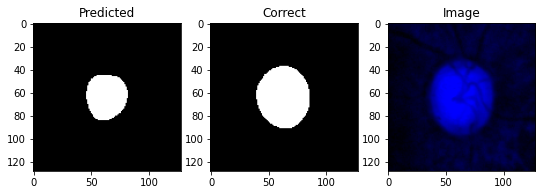

IOU: 0.5800308585166931
Dice: 0.7342019543973941
image #1


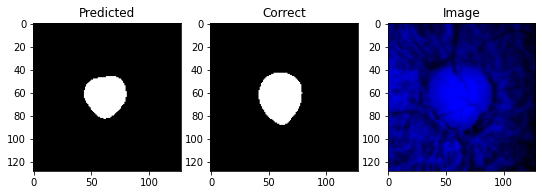

IOU: 0.7649310827255249
Dice: 0.8668112798264642
image #2


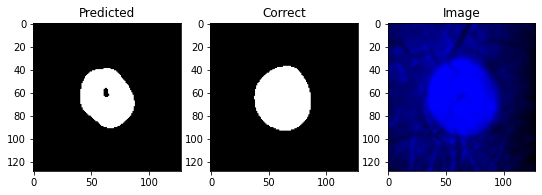

IOU: 0.8265922665596008
Dice: 0.9050649020106898
image #3


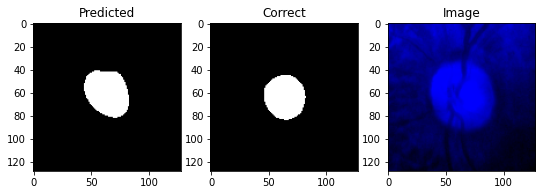

IOU: 0.7615793347358704
Dice: 0.8646551724137931
image #4


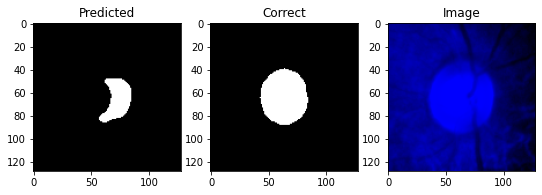

IOU: 0.4063694179058075
Dice: 0.5778985507246377
image #5


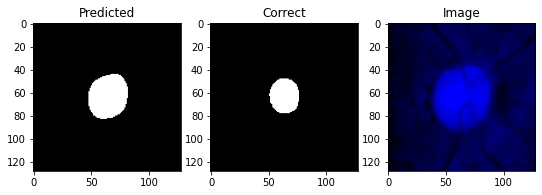

IOU: 0.5848172307014465
Dice: 0.7380248373743347
image #6


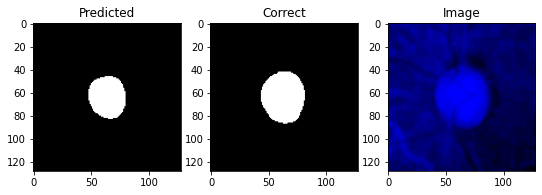

IOU: 0.7089552283287048
Dice: 0.8296943231441049
image #7


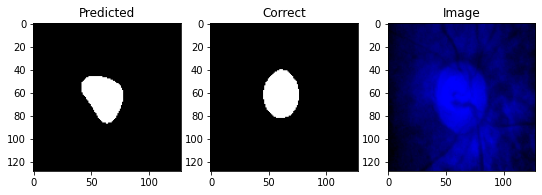

IOU: 0.7352690100669861
Dice: 0.8474409448818898
image #8


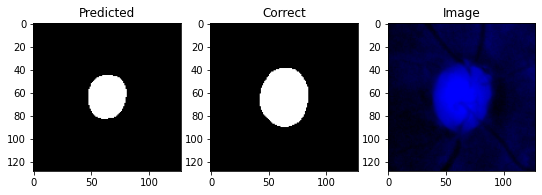

IOU: 0.5988235473632812
Dice: 0.7490802060338484
image #9


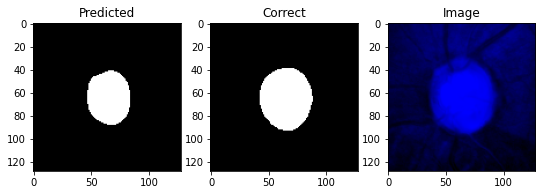

IOU: 0.7249742150306702
Dice: 0.8405623691295244
image #10


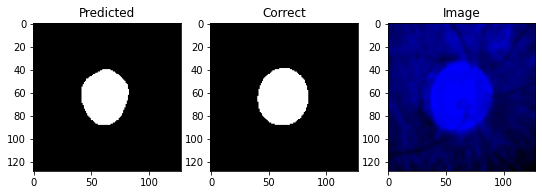

IOU: 0.8737637996673584
Dice: 0.9326296181310152
image #11


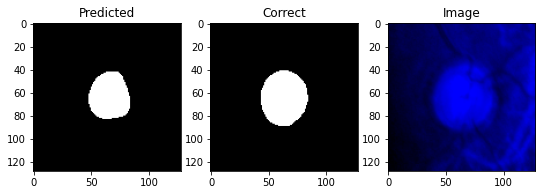

IOU: 0.7491961121559143
Dice: 0.8566176470588235
image #12


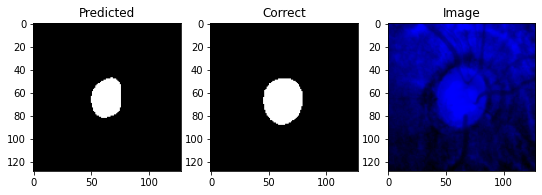

IOU: 0.6575091481208801
Dice: 0.7933701657458564
image #13


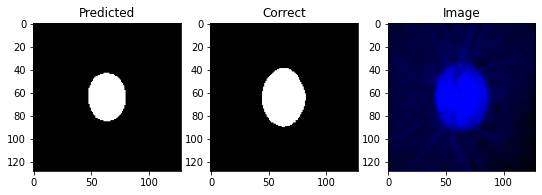

IOU: 0.7350136041641235
Dice: 0.8472712995681193
image #14


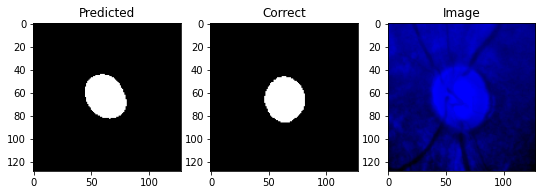

IOU: 0.7877000570297241
Dice: 0.88124410933082
image #15


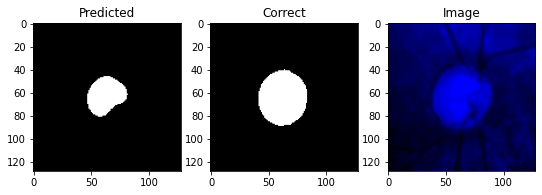

IOU: 0.5282308459281921
Dice: 0.6912972085385879
image #16


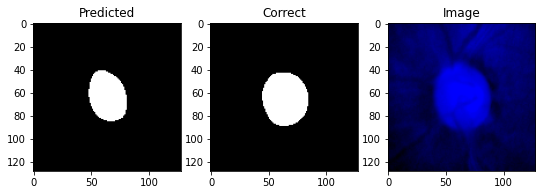

IOU: 0.7419785857200623
Dice: 0.851880276285495
image #17


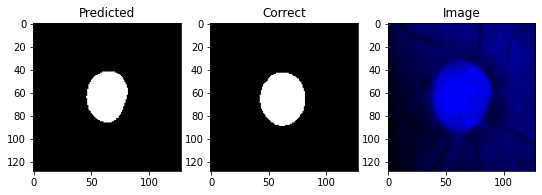

IOU: 0.8079834580421448
Dice: 0.8937952036543586
image #18


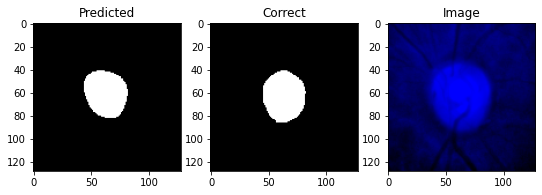

IOU: 0.8296943306922913
Dice: 0.9069212410501193
image #19


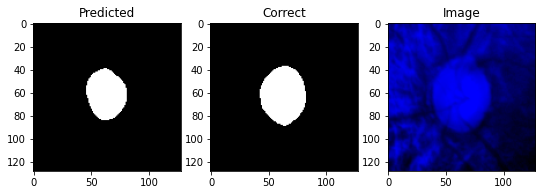

IOU: 0.7625806331634521
Dice: 0.8653001464128843
image #20


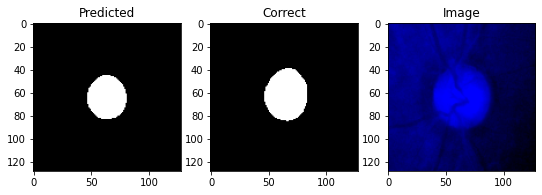

IOU: 0.7660862803459167
Dice: 0.8675525075010716
image #21


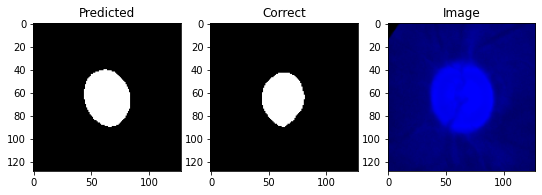

IOU: 0.8231469392776489
Dice: 0.9029957203994294
image #22


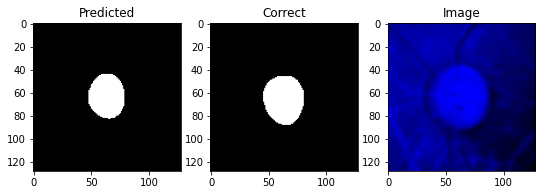

IOU: 0.7743801474571228
Dice: 0.8728458313926409
image #23


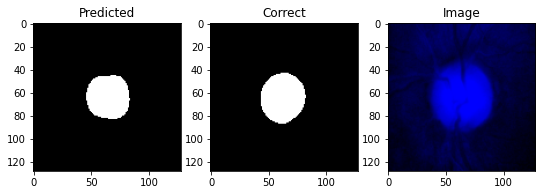

IOU: 0.8135469555854797
Dice: 0.8971887550200803
image #24


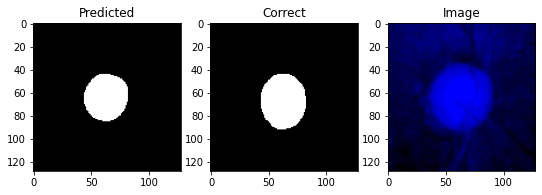

IOU: 0.8082010746002197
Dice: 0.8939283101682517
image #25


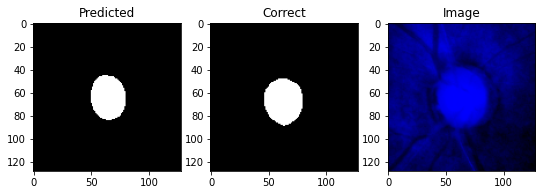

IOU: 0.7727272510528564
Dice: 0.8717948717948718
image #26


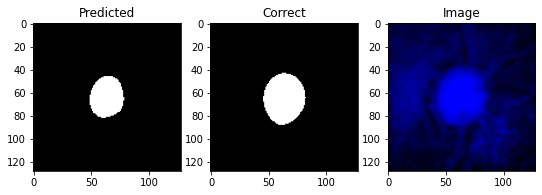

IOU: 0.676873505115509
Dice: 0.8073041806823642
image #27


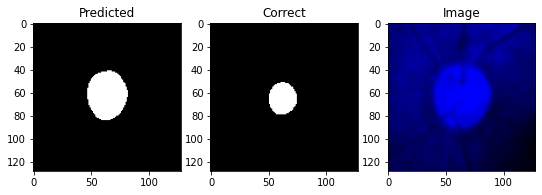

IOU: 0.45908698439598083
Dice: 0.6292798110979929
image #28


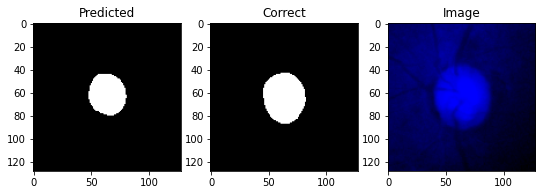

IOU: 0.7351308465003967
Dice: 0.8473491773308958
image #29


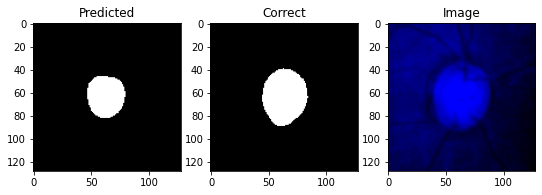

IOU: 0.6502363085746765
Dice: 0.7880523731587561
image #30


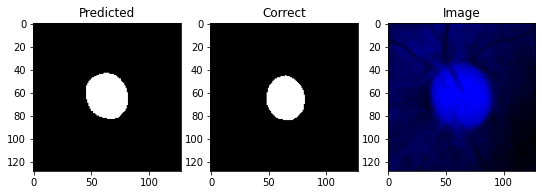

IOU: 0.8300597667694092
Dice: 0.9071395240317313
image #31


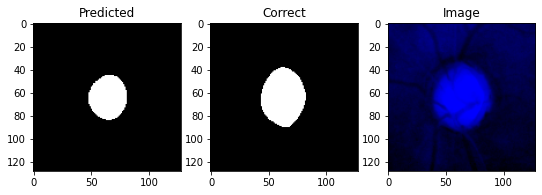

IOU: 0.666223406791687
Dice: 0.7996807661612131
image #32


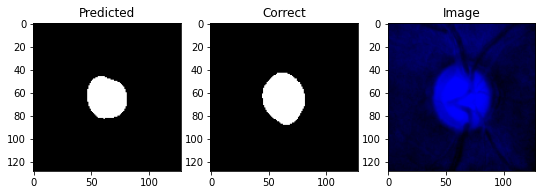

IOU: 0.7995188236236572
Dice: 0.8885918003565062
image #33


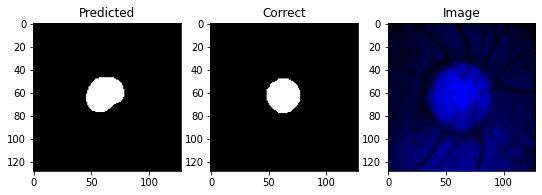

IOU: 0.748792290687561
Dice: 0.856353591160221
image #34


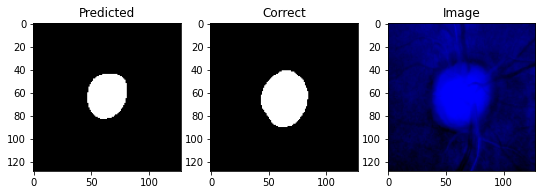

IOU: 0.7123016119003296
Dice: 0.831981460023175
image #35


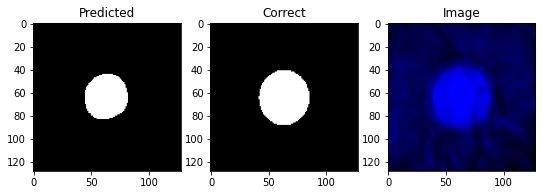

IOU: 0.7171779274940491
Dice: 0.8352983208288675
image #36


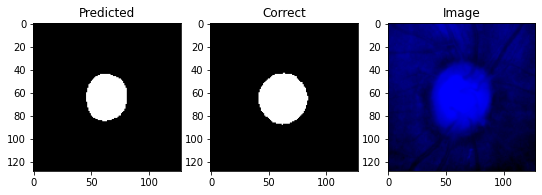

IOU: 0.7953135967254639
Dice: 0.8859884836852208
image #37


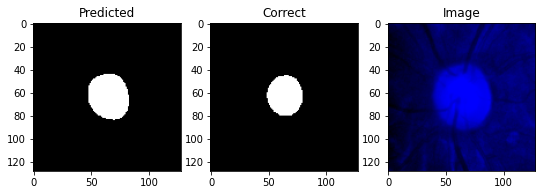

IOU: 0.7559893727302551
Dice: 0.8610409297625063
image #38


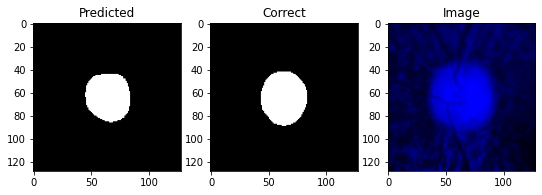

IOU: 0.8656021356582642
Dice: 0.927960057061341
image #39


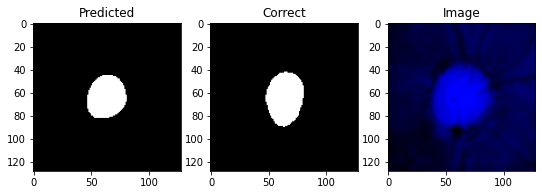

IOU: 0.7831031680107117
Dice: 0.8783599088838269
image #40


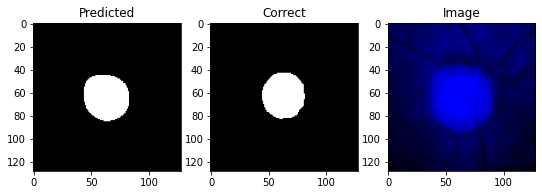

IOU: 0.846676766872406
Dice: 0.9169734151329243
image #41


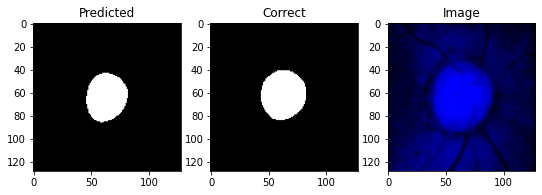

IOU: 0.8420279026031494
Dice: 0.9142401276426008
image #42


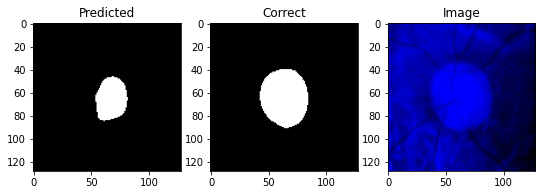

IOU: 0.4951980710029602
Dice: 0.6623845845042152
image #43


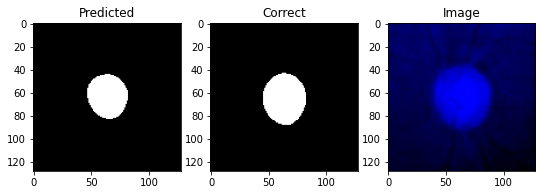

IOU: 0.8103315234184265
Dice: 0.8952299829642248
image #44


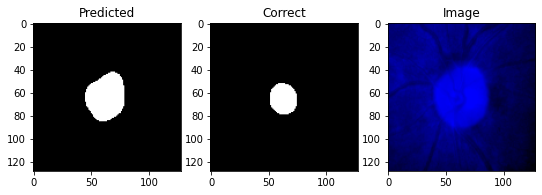

IOU: 0.4632819592952728
Dice: 0.6332094175960347
image #45


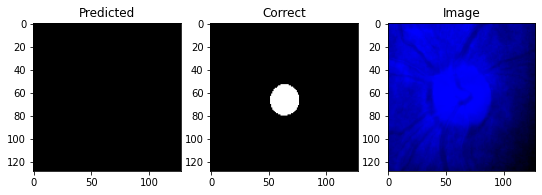

IOU: 0.0
Dice: 0.0
image #46


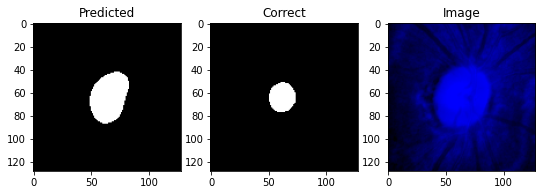

IOU: 0.4176313579082489
Dice: 0.5891959798994975
image #47


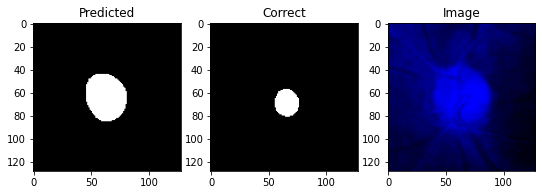

IOU: 0.34342560172080994
Dice: 0.5112685125563425
image #48


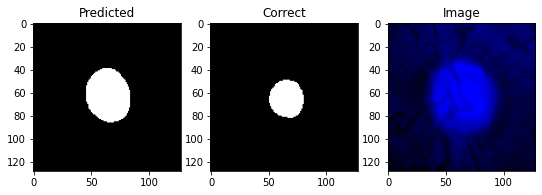

IOU: 0.547703206539154
Dice: 0.7077625570776256
image #49


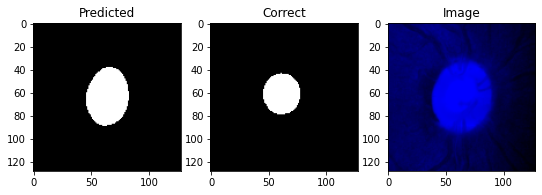

IOU: 0.6062884330749512
Dice: 0.7548936170212766
image #50


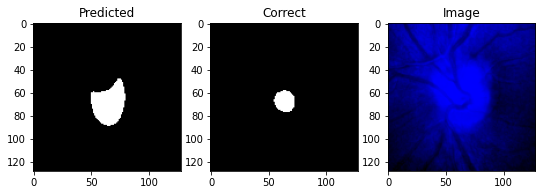

IOU: 0.3247232437133789
Dice: 0.49025069637883006


In [9]:
pred_iou, pred_dice, pred_cup = predict(value_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.68268186
0.7960756220977901


### Training and Test disc

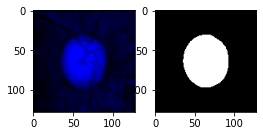

In [11]:
X_test, Z_test = next(data_generator(value_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size) 

history_disc = train(value_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_value', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 32s 321ms/step - loss: 0.1529 - mean_IOU_gpu: 0.7455 - dice_metric: 0.8408 - val_loss: 0.1215 - val_mean_IOU_gpu: 0.7682 - val_dice_metric: 0.8664
Epoch 2/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0689 - mean_IOU_gpu: 0.8468 - dice_metric: 0.9145 - val_loss: 0.1132 - val_mean_IOU_gpu: 0.7799 - val_dice_metric: 0.8740
Epoch 3/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0755 - mean_IOU_gpu: 0.8416 - dice_metric: 0.9105 - val_loss: 0.1292 - val_mean_IOU_gpu: 0.7575 - val_dice_metric: 0.8598
Epoch 4/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0658 - mean_IOU_gpu: 0.8516 - dice_metric: 0.9181 - val_loss: 0.1383 - val_mean_IOU_gpu: 0.7457 - val_dice_metric: 0.8519
Epoch 5/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0606 - mean_IOU_gpu: 0.8668 - dice_metric: 0.9266 - val_loss: 0.1194 - val_mean_IOU_gpu: 0.7722 - val_dice_metric: 0.8692


Epoch 42/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0476 - mean_IOU_gpu: 0.8893 - dice_metric: 0.9404 - val_loss: 0.1028 - val_mean_IOU_gpu: 0.7986 - val_dice_metric: 0.8857
Epoch 43/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0451 - mean_IOU_gpu: 0.8923 - dice_metric: 0.9424 - val_loss: 0.0941 - val_mean_IOU_gpu: 0.8118 - val_dice_metric: 0.8940
Epoch 44/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0497 - mean_IOU_gpu: 0.8833 - dice_metric: 0.9372 - val_loss: 0.0879 - val_mean_IOU_gpu: 0.8201 - val_dice_metric: 0.8991
Epoch 45/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0450 - mean_IOU_gpu: 0.8934 - dice_metric: 0.9430 - val_loss: 0.0900 - val_mean_IOU_gpu: 0.8171 - val_dice_metric: 0.8972
Epoch 46/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0412 - mean_IOU_gpu: 0.9002 - dice_metric: 0.9469 - val_loss: 0.0896 - val_mean_IOU_gpu: 0.8180 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 31s 314ms/step - loss: 0.0402 - mean_IOU_gpu: 0.9025 - dice_metric: 0.9483 - val_loss: 0.0784 - val_mean_IOU_gpu: 0.8359 - val_dice_metric: 0.9085
Epoch 84/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0444 - mean_IOU_gpu: 0.8942 - dice_metric: 0.9436 - val_loss: 0.0704 - val_mean_IOU_gpu: 0.8488 - val_dice_metric: 0.9162
Epoch 85/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0437 - mean_IOU_gpu: 0.8960 - dice_metric: 0.9445 - val_loss: 0.0624 - val_mean_IOU_gpu: 0.8615 - val_dice_metric: 0.9236
Epoch 86/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0424 - mean_IOU_gpu: 0.8988 - dice_metric: 0.9457 - val_loss: 0.0765 - val_mean_IOU_gpu: 0.8382 - val_dice_metric: 0.9099
Epoch 87/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0400 - mean_IOU_gpu: 0.9030 - dice_metric: 0.9484 - val_loss: 0.0763 - val_mean_IOU_gpu: 0.8391 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0425 - mean_IOU_gpu: 0.8980 - dice_metric: 0.9455 - val_loss: 0.0558 - val_mean_IOU_gpu: 0.8722 - val_dice_metric: 0.9293
Epoch 125/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0428 - mean_IOU_gpu: 0.8982 - dice_metric: 0.9456 - val_loss: 0.0595 - val_mean_IOU_gpu: 0.8657 - val_dice_metric: 0.9257
Epoch 126/500
99/99 [==============================] - 31s 315ms/step - loss: 0.0395 - mean_IOU_gpu: 0.9048 - dice_metric: 0.9495 - val_loss: 0.0591 - val_mean_IOU_gpu: 0.8667 - val_dice_metric: 0.9260
Epoch 127/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0370 - mean_IOU_gpu: 0.9096 - dice_metric: 0.9522 - val_loss: 0.0607 - val_mean_IOU_gpu: 0.8642 - val_dice_metric: 0.9244
Epoch 128/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0367 - mean_IOU_gpu: 0.9103 - dice_metric: 0.9526 - val_loss: 0.0614 - val_mean_IOU_gpu: 0.8633 - val_dice_metri

Epoch 205/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0332 - mean_IOU_gpu: 0.9181 - dice_metric: 0.9569 - val_loss: 0.0633 - val_mean_IOU_gpu: 0.8615 - val_dice_metric: 0.9211
Epoch 206/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0363 - mean_IOU_gpu: 0.9127 - dice_metric: 0.9537 - val_loss: 0.0600 - val_mean_IOU_gpu: 0.8666 - val_dice_metric: 0.9243
Epoch 207/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0345 - mean_IOU_gpu: 0.9149 - dice_metric: 0.9552 - val_loss: 0.0616 - val_mean_IOU_gpu: 0.8644 - val_dice_metric: 0.9229
Epoch 208/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0326 - mean_IOU_gpu: 0.9190 - dice_metric: 0.9574 - val_loss: 0.0633 - val_mean_IOU_gpu: 0.8616 - val_dice_metric: 0.9207
Epoch 209/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0359 - mean_IOU_gpu: 0.9126 - dice_metric: 0.9538 - val_loss: 0.0629 - val_mean_IOU_gpu: 0.8620 - val_dice_metri

Epoch 286/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0322 - mean_IOU_gpu: 0.9208 - dice_metric: 0.9583 - val_loss: 0.0703 - val_mean_IOU_gpu: 0.8507 - val_dice_metric: 0.9128
Epoch 287/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0325 - mean_IOU_gpu: 0.9206 - dice_metric: 0.9582 - val_loss: 0.0718 - val_mean_IOU_gpu: 0.8485 - val_dice_metric: 0.9111
Epoch 288/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0344 - mean_IOU_gpu: 0.9152 - dice_metric: 0.9552 - val_loss: 0.0694 - val_mean_IOU_gpu: 0.8524 - val_dice_metric: 0.9140
Epoch 289/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0304 - mean_IOU_gpu: 0.9242 - dice_metric: 0.9604 - val_loss: 0.0710 - val_mean_IOU_gpu: 0.8503 - val_dice_metric: 0.9125
Epoch 290/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0332 - mean_IOU_gpu: 0.9186 - dice_metric: 0.9571 - val_loss: 0.0698 - val_mean_IOU_gpu: 0.8515 - val_dice_metri

Epoch 367/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0313 - mean_IOU_gpu: 0.9222 - dice_metric: 0.9591 - val_loss: 0.0800 - val_mean_IOU_gpu: 0.8375 - val_dice_metric: 0.9031
Epoch 368/500
99/99 [==============================] - 31s 315ms/step - loss: 0.0290 - mean_IOU_gpu: 0.9268 - dice_metric: 0.9617 - val_loss: 0.0772 - val_mean_IOU_gpu: 0.8417 - val_dice_metric: 0.9061
Epoch 369/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0294 - mean_IOU_gpu: 0.9264 - dice_metric: 0.9615 - val_loss: 0.0819 - val_mean_IOU_gpu: 0.8351 - val_dice_metric: 0.9012
Epoch 370/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0306 - mean_IOU_gpu: 0.9245 - dice_metric: 0.9603 - val_loss: 0.0777 - val_mean_IOU_gpu: 0.8405 - val_dice_metric: 0.9053
Epoch 371/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0311 - mean_IOU_gpu: 0.9229 - dice_metric: 0.9596 - val_loss: 0.0795 - val_mean_IOU_gpu: 0.8387 - val_dice_metri

Epoch 448/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0279 - mean_IOU_gpu: 0.9292 - dice_metric: 0.9632 - val_loss: 0.0841 - val_mean_IOU_gpu: 0.8304 - val_dice_metric: 0.8985
Epoch 449/500
99/99 [==============================] - 31s 315ms/step - loss: 0.0316 - mean_IOU_gpu: 0.9217 - dice_metric: 0.9589 - val_loss: 0.0880 - val_mean_IOU_gpu: 0.8247 - val_dice_metric: 0.8945
Epoch 450/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0290 - mean_IOU_gpu: 0.9279 - dice_metric: 0.9622 - val_loss: 0.0871 - val_mean_IOU_gpu: 0.8267 - val_dice_metric: 0.8957
Epoch 451/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0298 - mean_IOU_gpu: 0.9259 - dice_metric: 0.9612 - val_loss: 0.0878 - val_mean_IOU_gpu: 0.8261 - val_dice_metric: 0.8951
Epoch 452/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0297 - mean_IOU_gpu: 0.9265 - dice_metric: 0.9614 - val_loss: 0.0848 - val_mean_IOU_gpu: 0.8299 - val_dice_metri

image #0


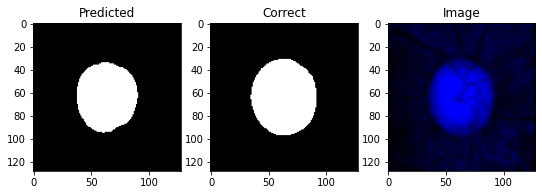

IOU: 0.8458164930343628
Dice: 0.9164686528970938
image #1


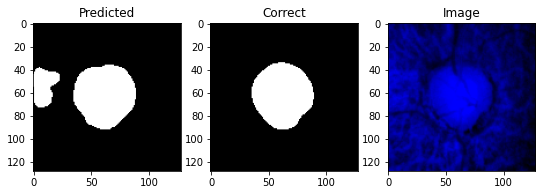

IOU: 0.7617756724357605
Dice: 0.864781688786305
image #2


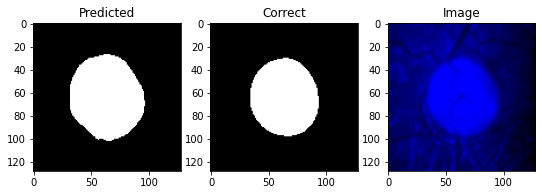

IOU: 0.8519220352172852
Dice: 0.920040929688642
image #3


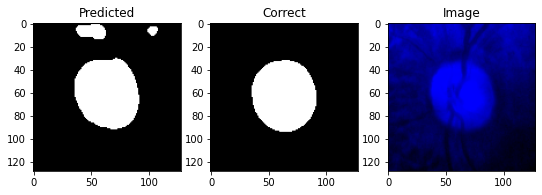

IOU: 0.818895161151886
Dice: 0.9004314063848144
image #4


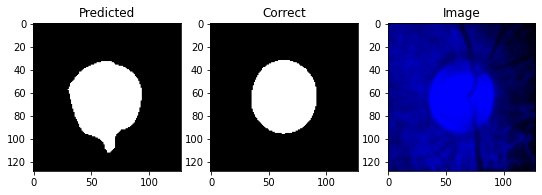

IOU: 0.8290876746177673
Dice: 0.9065587044534413
image #5


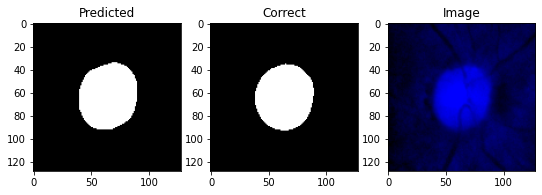

IOU: 0.9413980841636658
Dice: 0.9698145752479517
image #6


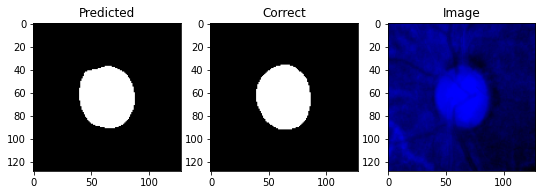

IOU: 0.9421911239624023
Dice: 0.9702352376380221
image #7


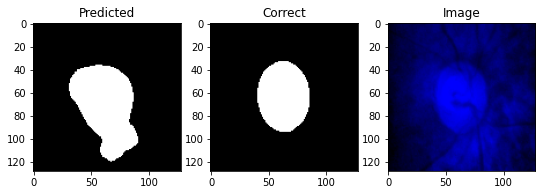

IOU: 0.6325045228004456
Dice: 0.774888558692422
image #8


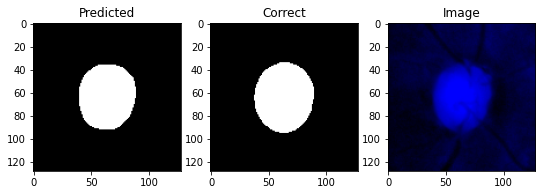

IOU: 0.9163621664047241
Dice: 0.9563559322033899
image #9


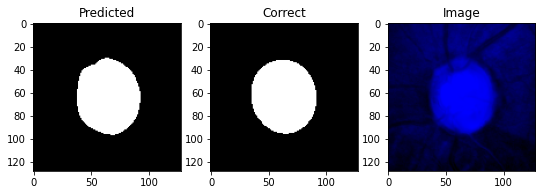

IOU: 0.938858687877655
Dice: 0.9684653118430273
image #10


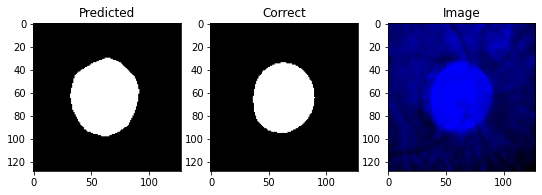

IOU: 0.8406846523284912
Dice: 0.913447782546495
image #11


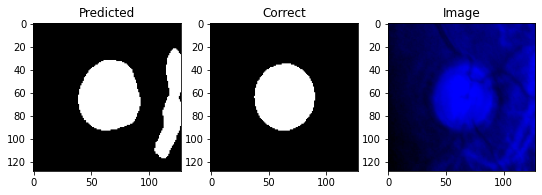

IOU: 0.6154452562332153
Dice: 0.7619512195121951
image #12


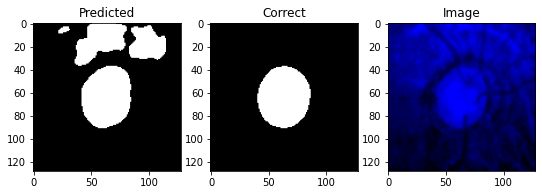

IOU: 0.4812450110912323
Dice: 0.6497844827586207
image #13


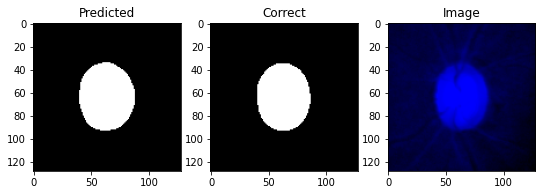

IOU: 0.9557130336761475
Dice: 0.9773550724637681
image #14


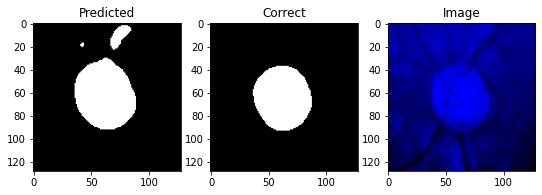

IOU: 0.8049501180648804
Dice: 0.8919361440851412
image #15


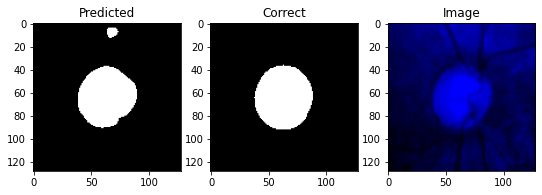

IOU: 0.8813186883926392
Dice: 0.9369158878504673
image #16


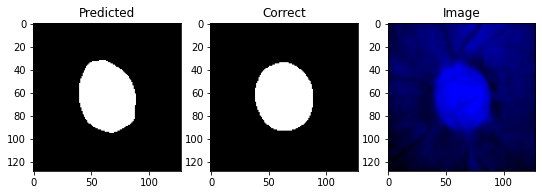

IOU: 0.9244069457054138
Dice: 0.9607187630589219
image #17


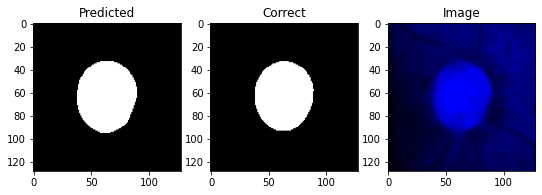

IOU: 0.9471191763877869
Dice: 0.9728415079043372
image #18


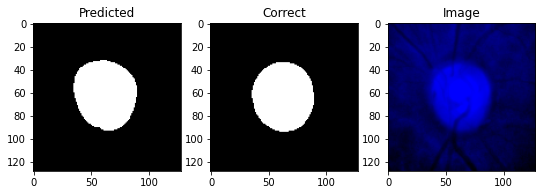

IOU: 0.9067702293395996
Dice: 0.9511059371362048
image #19


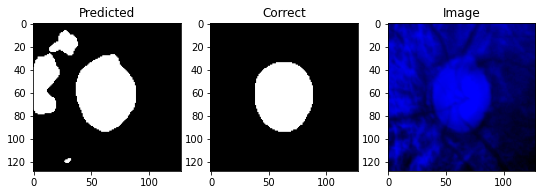

IOU: 0.6095802187919617
Dice: 0.75744
image #20


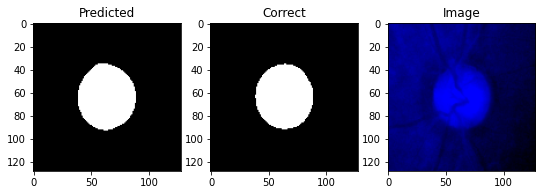

IOU: 0.9482228755950928
Dice: 0.9734234234234235
image #21


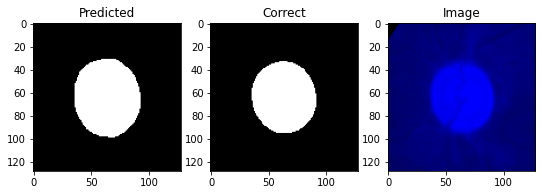

IOU: 0.8831126689910889
Dice: 0.9379286694101509
image #22


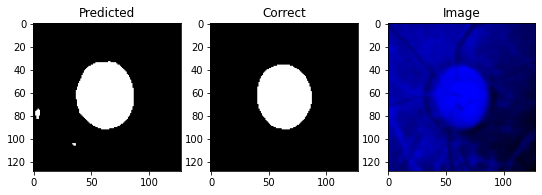

IOU: 0.8723583817481995
Dice: 0.9318284424379233
image #23


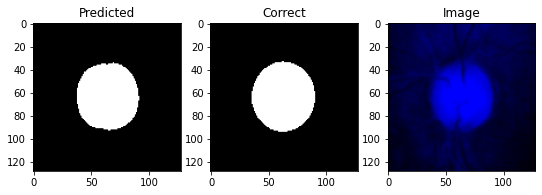

IOU: 0.9318698048591614
Dice: 0.9647335423197492
image #24


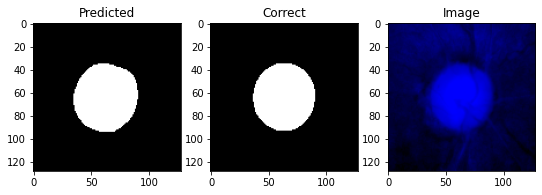

IOU: 0.9298444986343384
Dice: 0.9636470819414423
image #25


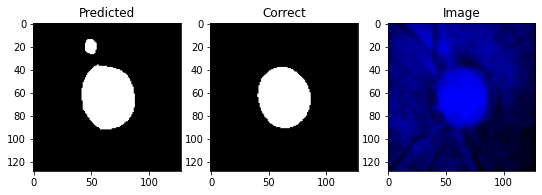

IOU: 0.8723205924034119
Dice: 0.931806869089099
image #26


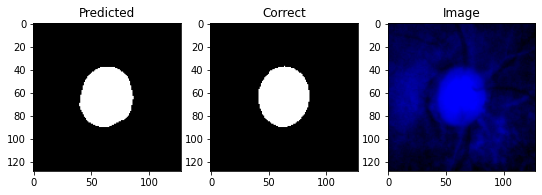

IOU: 0.9412382245063782
Dice: 0.9697297297297297
image #27


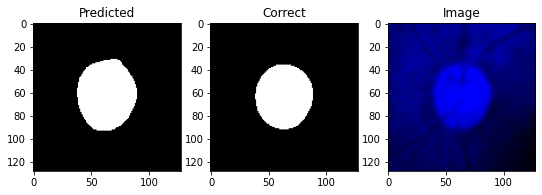

IOU: 0.8823293447494507
Dice: 0.9374866652442927
image #28


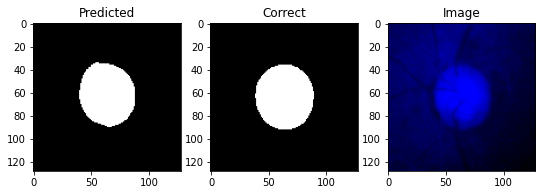

IOU: 0.8793774247169495
Dice: 0.9358178053830227
image #29


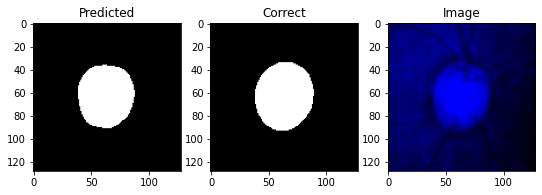

IOU: 0.8927074670791626
Dice: 0.9433126660761736
image #30


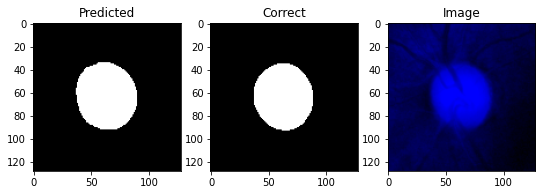

IOU: 0.9454397559165955
Dice: 0.9719547928003349
image #31


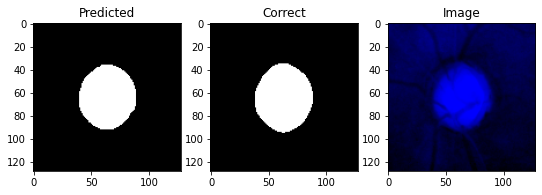

IOU: 0.9335664510726929
Dice: 0.9656419529837251
image #32


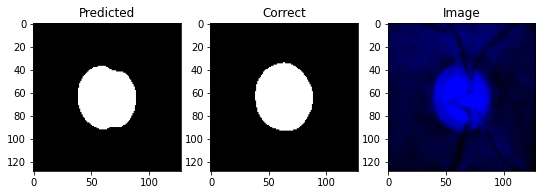

IOU: 0.9357204437255859
Dice: 0.966792957432583
image #33


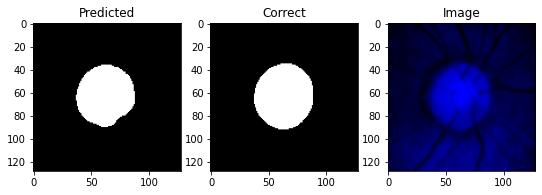

IOU: 0.8895147442817688
Dice: 0.9415271726668195
image #34


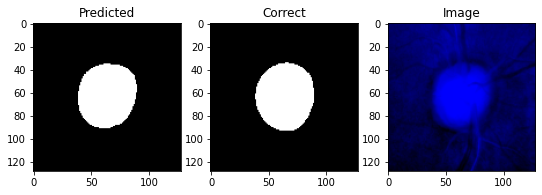

IOU: 0.9216417670249939
Dice: 0.9592233009708738
image #35


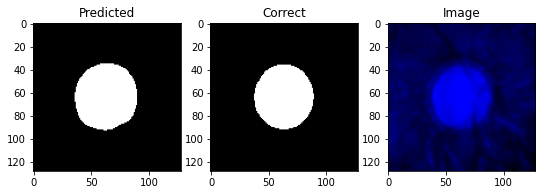

IOU: 0.9010813236236572
Dice: 0.9479671371392459
image #36


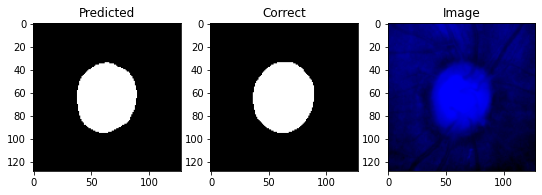

IOU: 0.9556074738502502
Dice: 0.977299880525687
image #37


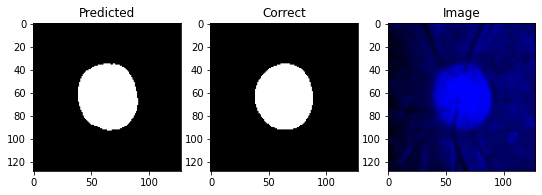

IOU: 0.9380972385406494
Dice: 0.9680600214362273
image #38


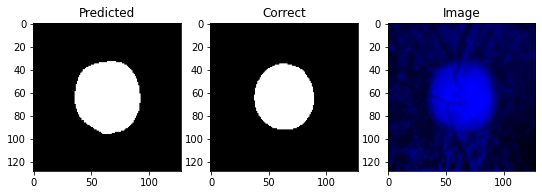

IOU: 0.8201262354850769
Dice: 0.901175110768638
image #39


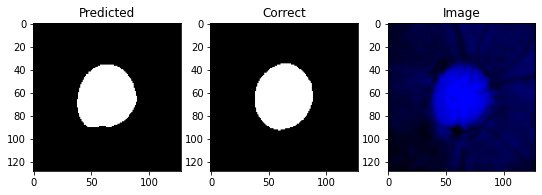

IOU: 0.9363279342651367
Dice: 0.9671171171171171
image #40


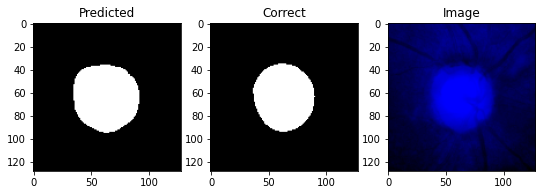

IOU: 0.8886430859565735
Dice: 0.9410386567746973
image #41


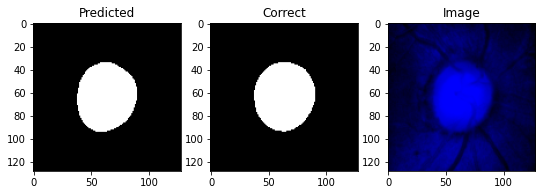

IOU: 0.9381889700889587
Dice: 0.9681088767011985
image #42


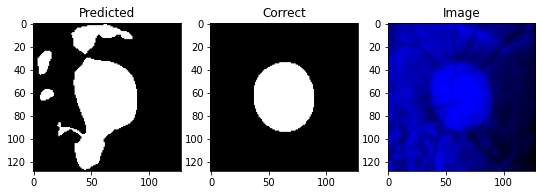

IOU: 0.5599280595779419
Dice: 0.7178895776272164
image #43


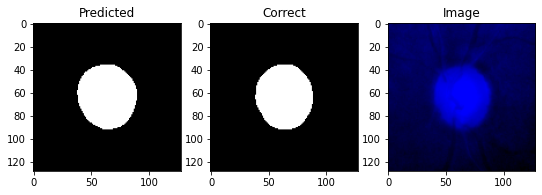

IOU: 0.9583516120910645
Dice: 0.97873293037833
image #44


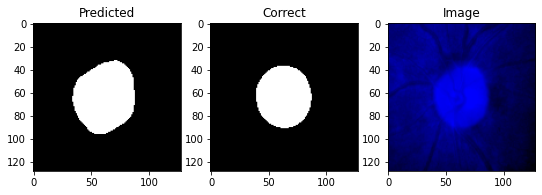

IOU: 0.7796869277954102
Dice: 0.8762068225702639
image #45


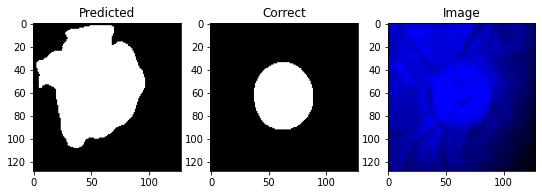

IOU: 0.3676379323005676
Dice: 0.5376246600181324
image #46


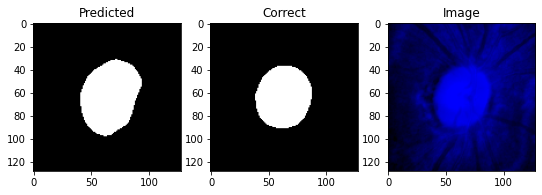

IOU: 0.7810583114624023
Dice: 0.8770721205597417
image #47


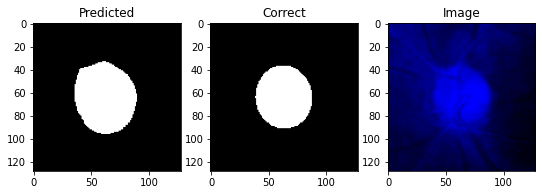

IOU: 0.7996947765350342
Dice: 0.8887004451982192
image #48


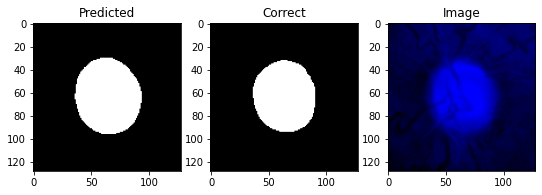

IOU: 0.8922356367111206
Dice: 0.9430491687301026
image #49


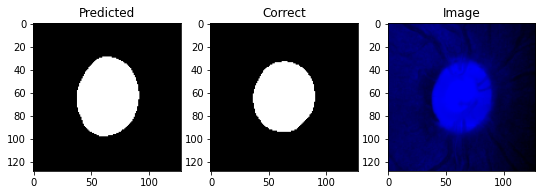

IOU: 0.882047712802887
Dice: 0.937327697114501
image #50


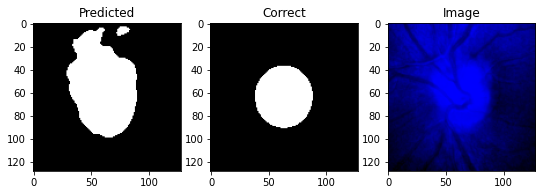

IOU: 0.5209462642669678
Dice: 0.6850291639662994


In [13]:
pred_iou, pred_dice, pred_disc = predict(value_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.84362686
0.9084076912487495


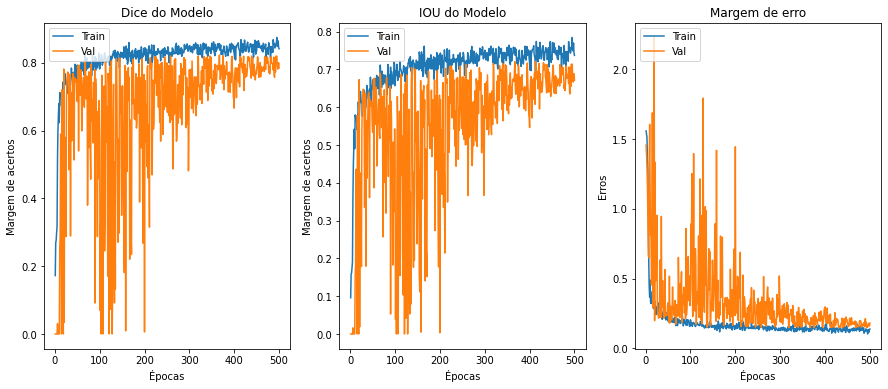

In [18]:
plot_results(history_cup, epochs)

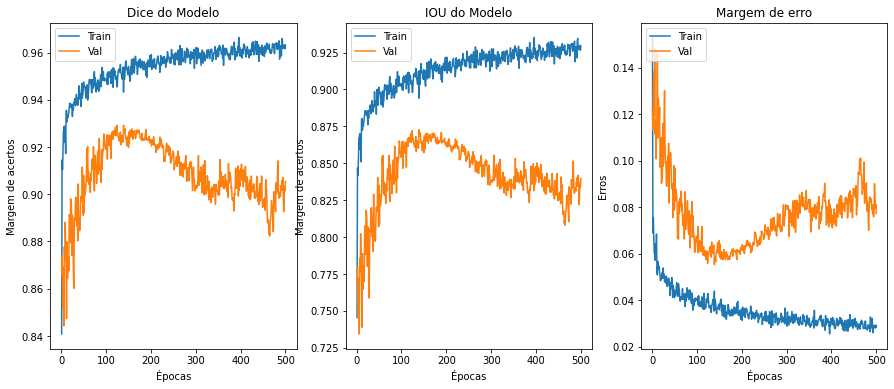

In [19]:
plot_results(history_disc, epochs)

In [22]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.668433714699625
image #1 - cdr = 0.6658438165760295
image #2 - cdr = 0.7162613154246963
image #3 - cdr = 0.7096056570711345
image #4 - cdr = 0.5624954154860128
image #5 - cdr = 0.6816911663754438
image #6 - cdr = 0.6866303126051477
image #7 - cdr = 0.4938282062552436
image #8 - cdr = 0.6729792911827285
image #9 - cdr = 0.7193305681063928
image #10 - cdr = 0.7190739259536721
image #11 - cdr = 0.6816369302274367
image #12 - cdr = 0.6388778547127258
image #13 - cdr = 0.7090244490459887
image #14 - cdr = 0.6636888041990148
image #15 - cdr = 0.6964864487530387
image #16 - cdr = 0.7138543890118209
image #17 - cdr = 0.7178636589917091
image #18 - cdr = 0.6993353548151393
image #19 - cdr = 0.6803106465347456
image #20 - cdr = 0.6676631667822509
image #21 - cdr = 0.7237363847339435
image #22 - cdr = 0.6655521785669327
image #23 - cdr = 0.6715018063985744
image #24 - cdr = 0.6936511743012478
image #25 - cdr = 0.700812211445969
image #26 - cdr = 0.6868909004957612
image #27 - c

In [23]:
pd.DataFrame(data= result)

cdr      area
0   0.668434  0.449541
1   0.665844  0.355108
2   0.716261  0.484840
3   0.709606  0.405512
4   0.562495  0.195620
5   0.681691  0.453849
6   0.686630  0.456950
7   0.493828  0.321986
8   0.672979  0.450841
9   0.719331  0.491431
10  0.719074  0.495721
11  0.681637  0.312682
12  0.638878  0.198245
13  0.709024  0.478280
14  0.663689  0.393137
15  0.696486  0.402486
16  0.713854  0.469228
17  0.717864  0.480443
18  0.699335  0.469302
19  0.680311  0.309992
20  0.667663  0.455481
21  0.723736  0.491120
22  0.665552  0.411689
23  0.671502  0.466561
24  0.693651  0.474693
25  0.700812  0.436857
26  0.686891  0.443740
27  0.690271  0.466265
28  0.662330  0.442959
29  0.665918  0.448324
30  0.688509  0.468277
31  0.695201  0.466263
32  0.680970  0.455876
33  0.651924  0.368193
34  0.706704  0.472576
35  0.684103  0.469478
36  0.681848  0.466640
37  0.700481  0.471154
38  0.682764  0.463885
39  0.687895  0.458296
40  0.699212  0.472727
41  0.709559  0.482406
42  0.419602  0.186525
43  0.688431  0.466195
44  0.667795  0.421153
45  0.000000  0.000000
46  0.693608  0.439702
47  0.675560  0.441053
48  0.712164  0.473561
49  0.737889  0.504170
50  0.429755  0.200345

In [ ]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})